# 2.1. О чём этот модуль
Модуль 2 посвящён методам предобработки данных.

Предобработка данных — это действия с данными перед передачей их модели, могут включать в себя центрирование, нормализацию, сдвиг, вращение, обрезку. Часто требуется при необходимости очистить данные от ненужного или дополнить какой-то информацией.

План модуля:
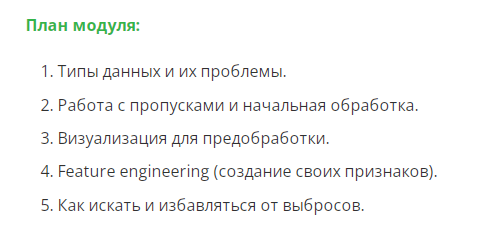

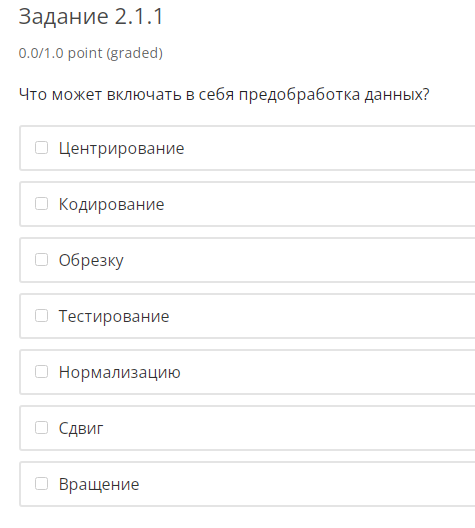

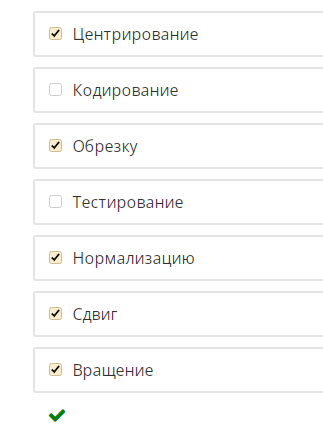

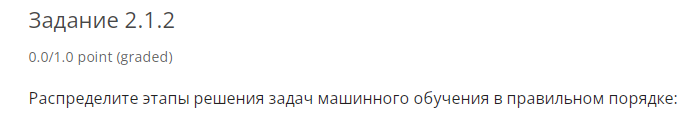

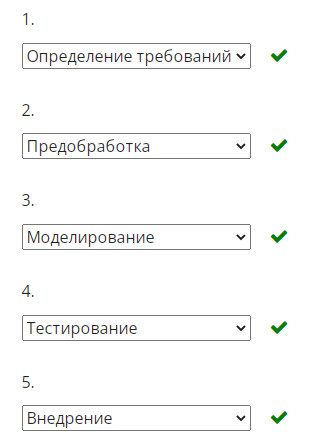

# 2.2. Типы данных
### Ординальный(Порядковый), Категориальный(Номинальный), Числовой(Количественный)
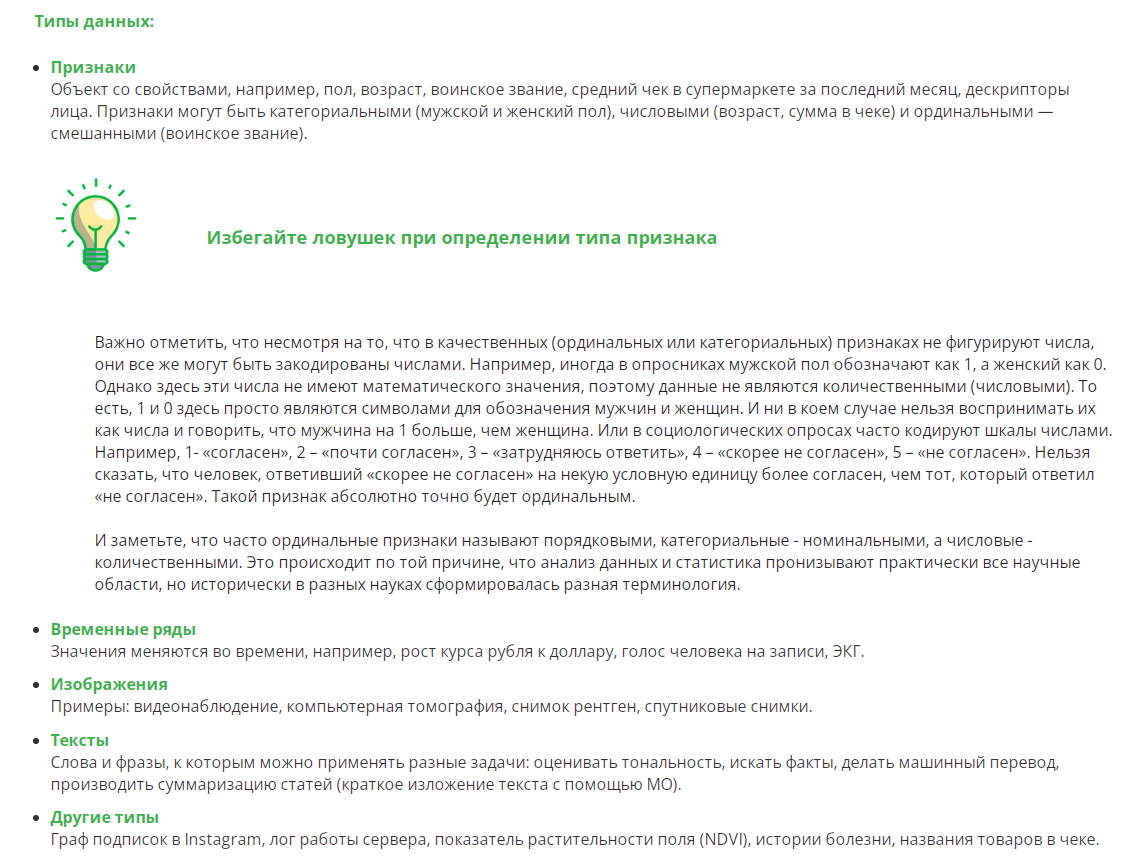

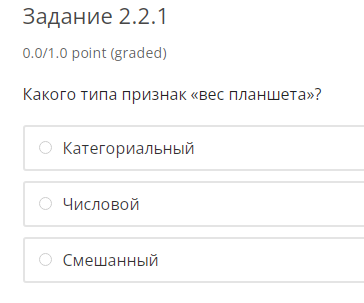

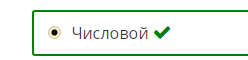

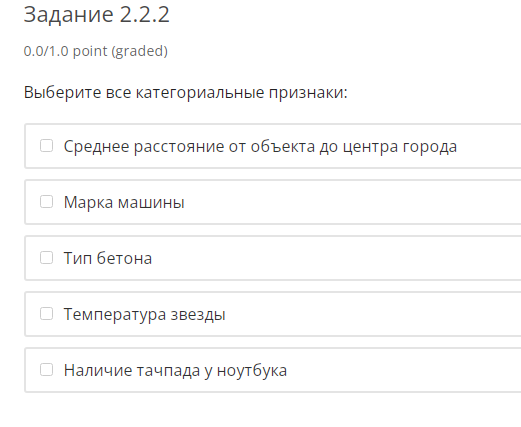

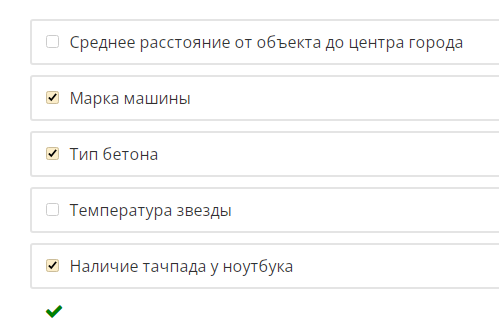

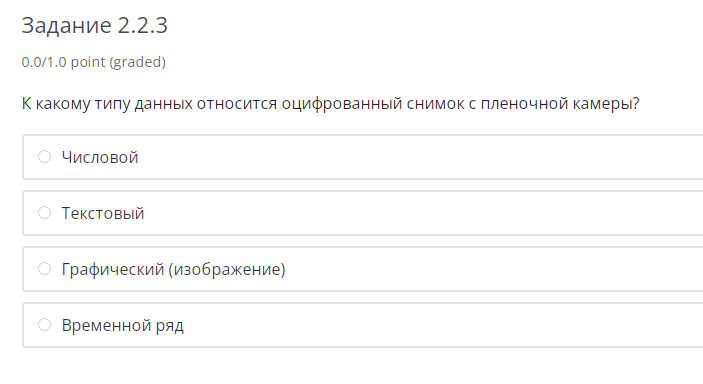

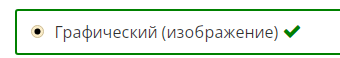

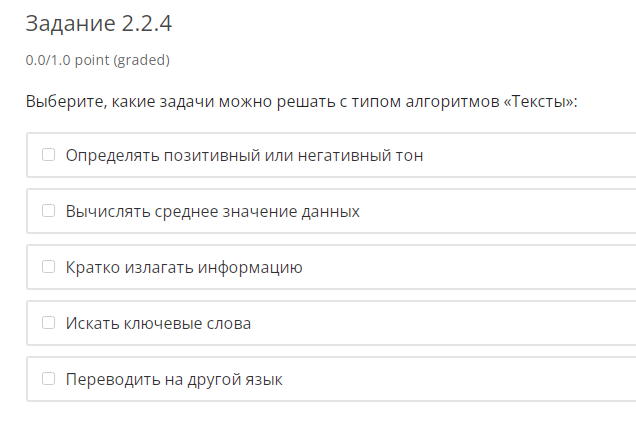

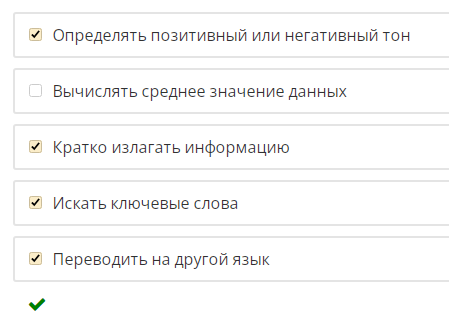

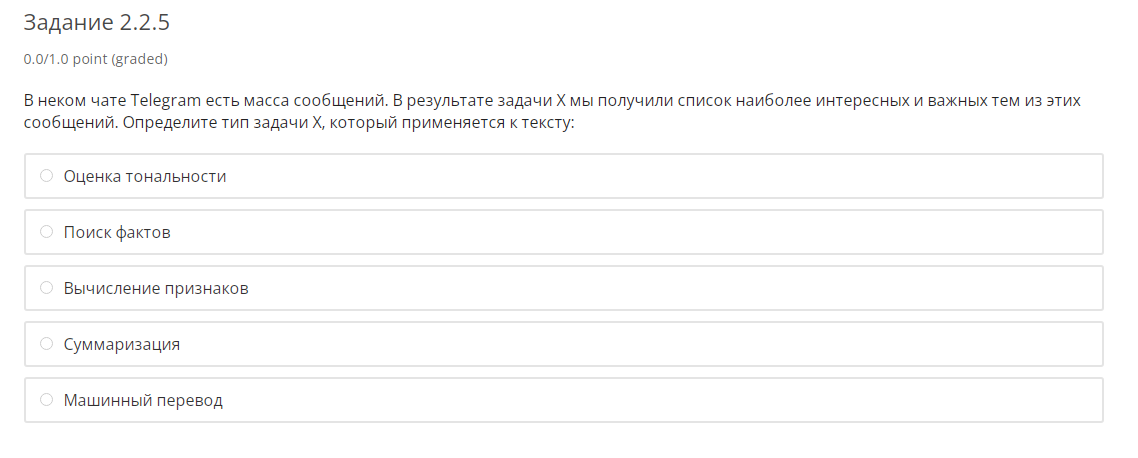

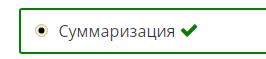

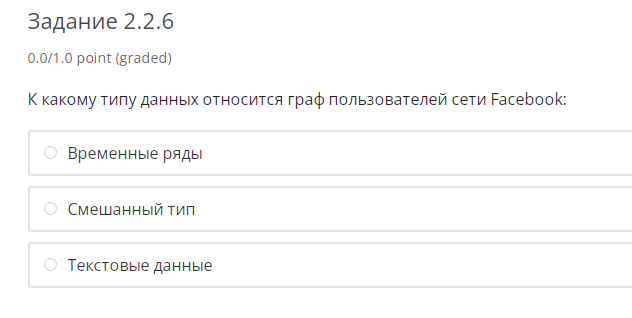

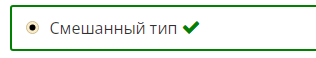

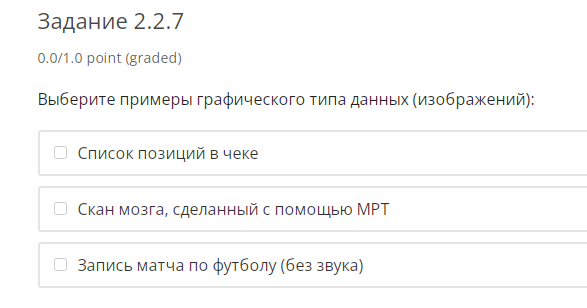

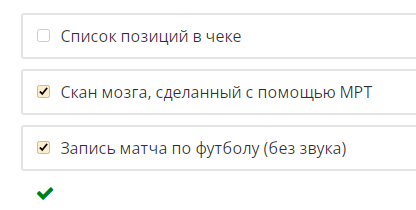

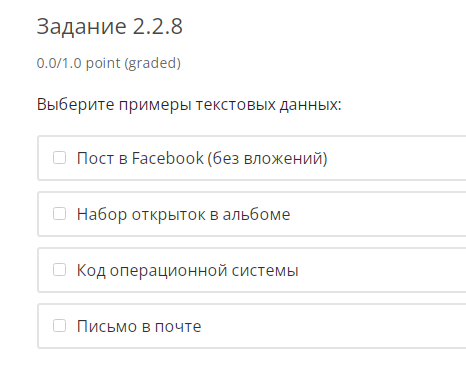

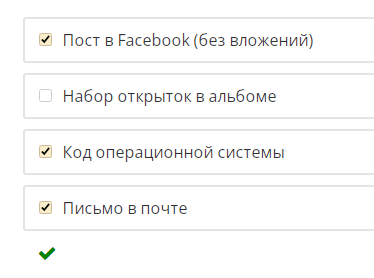

# 2.3. Практика
Определять правильно типы признаков в данных очень важно, так как не все методы мы можем применять к любым типам признаков. Кроме того, не все признаки можно сразу использовать - некоторые требуют дополнительной предобработки. Поэтому прежде, чем приступить к решению задачи, необходимо посмотреть на датасет и понять, с какими признаками вы имеете дело.

Один из крупных российских банков предоставил данные о московских квартирах, выставленных на продажу:

https://drive.google.com/file/d/1Z6cQB7THbrKp9o3AUEtV6E_rNWQUxp5Y/view

Давайте для начала откроем наш файл и посмотрим на данные, которые нам предложены:

In [6]:
import pandas as pd
data = pd.read_csv('data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [7]:
# Для того, чтобы посмотреть на типы данных, запросим информацию о датасете:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

Обратите внимание на типы признаков. Категориальные и ординальные чаще всего закодированы как признаки типа "object" (но помните, что иногда категориальные и ординальные могут быть закодированы и числами, поэтому в будущем всегда внимательно смотрите на полученные данные!)

# Задание 2.3.1
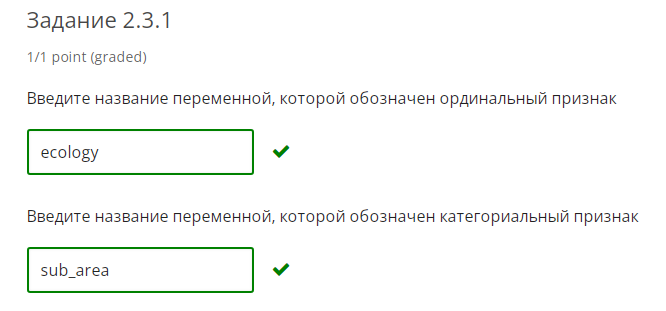

# 2.4. Проблемы данных